<h1>Homework 2</h1>

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt


<h2> Research Questions </h2>

<h3> Question 1 </h3>
<p>
Exploratory Data Analysis (EDA):<br> 

- Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.<br>
 </p>

In [16]:
# Load a "few" records from the lighter_authors.json dataset
authors = pd.read_json('data/lighter_authors.json', lines=True)

authors



,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
...,...,...,...,...,...,...,...,...,...,...,...,...
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0


In [36]:
# Load a "few" records from the lighter_books.json dataset
with open('data/lighter_books.json') as lighter_books:
    data = lighter_books.readlines(20000000)
    books = pd.DataFrame(list(map(json.loads, data)))

books


,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,8837,"Wind, Sand and Stars","[{'id': '1020792', 'name': 'Antoine de Saint-E...",Antoine de Saint-Exupéry,1020792,1198592,0156027496,9780156027496,,,...,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Mariner Books,229,,,,"[{'name': 'to-read', 'count': 1188}, {'name': ...",Recipient of the Grand Prix of the Académie Fr...
5569,8838,Wartime Writings 1939-1944,"[{'id': '1020792', 'name': 'Antoine de Saint-E...",Antoine de Saint-Exupéry,1020792,201287,0156027534,9780156027533,,,...,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Mariner Books,264,,,,"[{'name': 'to-read', 'count': 264}, {'name': '...",This volume includes the aviator's letters to ...
5570,8839,Flight to Arras,None,Antoine de Saint-Exupéry,1020792,2639067,141798967X,9781417989676,,,...,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 1985}, {'name': ...",A recollection of the shattering days during W...
5571,8840,Saint-Exupéry,"[{'id': '5741', 'name': 'Stacy Schiff', 'role'...",Stacy Schiff,5741,11750,0805079130,9780805079135,,eng,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Holt Paperbacks,560,,,,"[{'name': 'to-read', 'count': 1187}, {'name': ...","<b>From a master biographer, the life story of..."


In [59]:

# print the number of loaded records
print(f"Loaded {authors.size} records from lighter_authors.json")

# print the dataframe fields info
authors.dtypes


Loaded 4221204 records from lighter_authors.json


ratings_count           int64
average_rating        float64
text_reviews_count      int64
work_ids               object
book_ids               object
works_count             int64
id                      int64
name                   object
gender                 object
image_url              object
about                  object
fans_count              int64
dtype: object

In [7]:

# print the number of loaded records
print(f"Loaded {books.size} records from lighter_books.json")

# print the dataframe fields info
books.dtypes



Loaded 144898 records from lighter_books.json


id                             int64
title                         object
authors                       object
author_name                   object
author_id                      int64
work_id                        int64
isbn                          object
isbn13                        object
asin                          object
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
edition_information           object
image_url                     object
publisher                     object
num_pages                     object
series_id                     object
series_name                   object
series_position               object
shelves                       object
description                   object
dtype: object

<h3> Question 2</h3>
<p> 
Let’s finally dig into this vast dataset, retrieving some vital information: <br>

- Plot the number of books for each author in descending order. <br>
- Which book has the highest number of reviews? <br>
- Which are the top ten and ten worst books concerning the average score? <br>
- Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library. <br>
- How many books have more than 250 pages? <br>
- Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books). <br>
</p>

<Axes: >

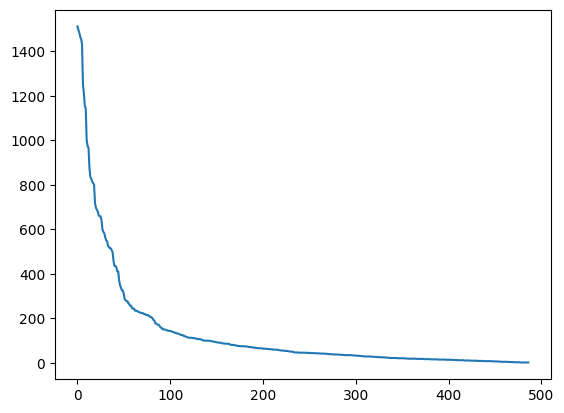

In [8]:

# Plot the number of books for each author in descending order

# book_counts = authors.book_ids.map(len).sort_values(ascending=False, ignore_index=True)
# book_counts.plot(kind='line')

authors.loc[:, 'book_ids'].map(len).sort_values(ascending=False, ignore_index=True).plot(kind='line')



In [9]:
# which book has the highest number of reviews 

books.loc[[books.text_reviews_count.idxmax()],['title']]

,title
1,Harry Potter and the Sorcerer's Stone (Harry P...


In [10]:
# sort books by score
books_sorted_by_score = books.loc[:,['title', 'average_rating']].sort_values('average_rating', ascending=False)

In [11]:
# what are the top 10 books regarding the score

books_sorted_by_score.head(10)

,title,average_rating
5052,Mr. Men and Little Miss Picture Dictionary,5.0
1378,"Mahatma Gandhi, A Biography (1st)",5.0
3921,From the Life: Imaginary Portraits of Some Dis...,5.0
3925,Bicycle And Other Poems.,5.0
5443,"The British Campaign In France And Flanders, 1915",5.0
1441,"On Tolkien: Interviews, Reminiscences, and Oth...",5.0
1460,"The Cestus of Aglaia, the Queen of the Air",5.0
1521,"Prolegomena to Homer, 1795",5.0
1213,A Den Of Thieves,5.0
3045,The Decoration of the Torre de la Parada (Corp...,5.0


In [12]:

# what are the worst 10 books regarding the score

books_sorted_by_score.tail(10)


,title,average_rating
3143,Seasons of Charlotte,0.0
1993,"""Stark Schwach"" Fabeln",0.0
1956,Sixteen Pleasures: Forbidden Erotics of the It...,0.0
3026,2003 International Codes: The Complete Collect...,0.0
1998,Phaedrus/Menexenus/Lysis/Hippias Maior/Hippias...,0.0
4242,Ntcs Basic Japanese Level Teachers Man (Langua...,0.0
1635,Praise Of Folly: And Other Papers,0.0
5083,An Apple A Day,0.0
5252,Machines By Design.,0.0
1522,Commentaries - Kommentare,0.0


<Axes: xlabel='language'>

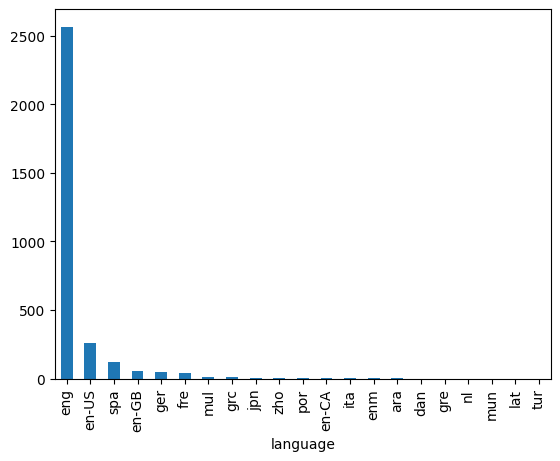

In [13]:
# language distribution

books.loc[books.language != "", ['language']].groupby('language').size().sort_values(ascending=False).plot(kind='bar')

In [14]:
# how many books have more than 250 pages

len(books.loc[books.num_pages.map(lambda x: int(x)>250 if x else False)])


2624

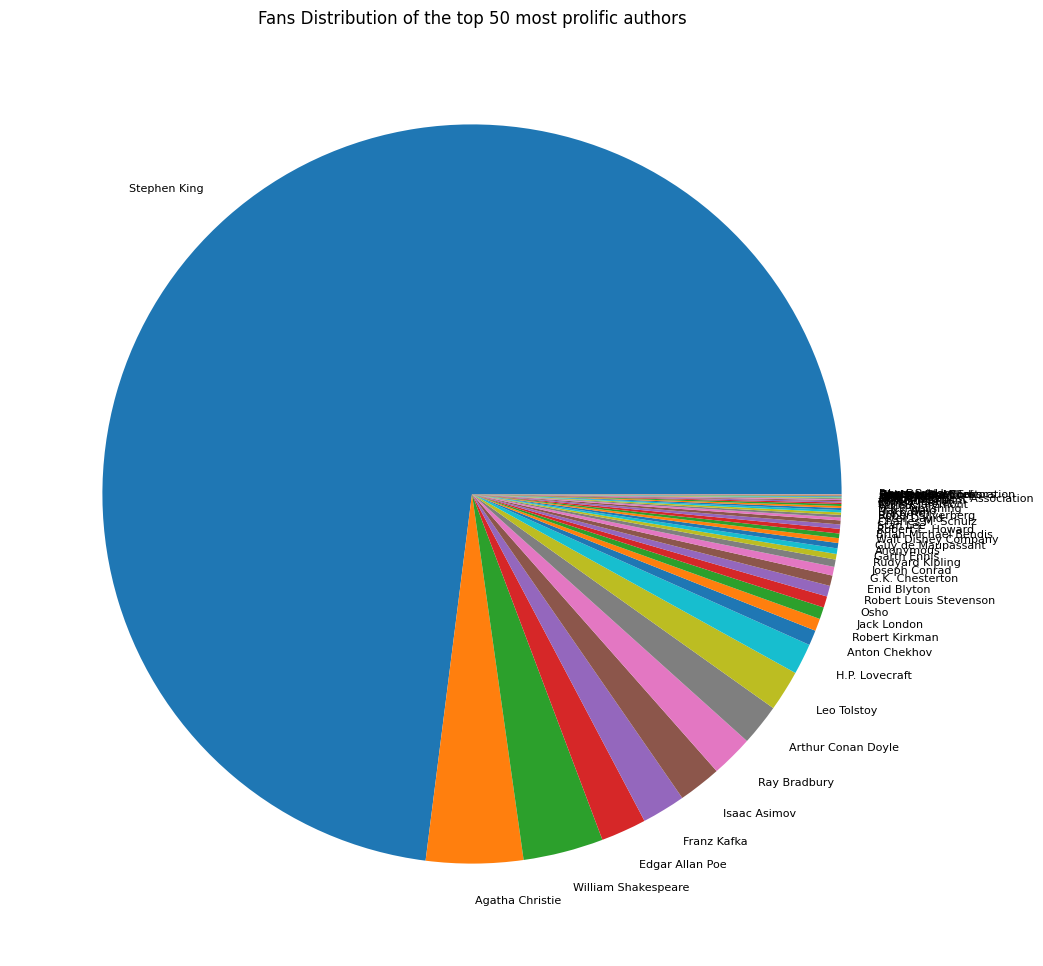

In [65]:
# Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)


# Get the first 50 most profilic authors 
# Sort descending by number of book_id in books_ids and take the first 50
prolific_authors = authors.sort_values(['book_ids'], key=lambda x: x.map(len), ascending=False).head(50)

# Sort the 50 most profilic authors by the number of fans
fans_dist = prolific_authors.loc[:, ['name', 'fans_count']].sort_values(['fans_count'], ascending=False)

# Plot distribution of fans_count (x = fans_count, labels = author name) 
p = fans_dist.plot(legend=False, title="Fans Distribution of the top 50 most prolific authors", figsize=(12,12))
p.pie(x=fans_dist.fans_count, labels=fans_dist.name, textprops={'size': 8})
plt.show()


<h3> Question 3 </h3>
<p>
Let’s have a historical look at the dataset! <br>

- Write a function that takes as input a year and returns as output the following information: <br>
    - The number of books published that year. <br>
    - The total number of pages written that year. <br>
    - The most prolific month of that year. <br>
    - The longest book written that year. <br>
- Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years. <br>
- Ask **ChatGPT** or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.  <br>
</p>

In [33]:
pd.set_option('mode.chained_assignment', None)

# The funciton takes in input a date of the shape
# "" | "yyyy" | "yyyy-mm" | "yyyy-mm-dd"
# and the return the value of "mm" that varies in [1,12]
# if mm has non value return "0"

def getMonth(date):
    d = date.split("-")
    if len(d) > 1:
        return d[1]
    return "0"

def historicInfo(books:pd.DataFrame, year:int):

    # filter only the books of the year
    books_of_the_year = books.loc[books.publication_date.map(lambda x: x.split('-')[0] == year)]

    # add a 'month' field to the dataframe  and change the 'num_pages' field type, from str to int (if num_pages == "" then use 0)
    books_of_the_year.loc[:, 'month'] = books_of_the_year.publication_date.map(getMonth)
    books_of_the_year.loc[:, 'num_pages'] = books_of_the_year.num_pages.map(lambda x: int(x) if x else 0)

    # get the number of books by counting the number of records of books_of_the_year
    # get the total number of pages by summing the 'num_pages' field values
    no_books = len(books_of_the_year)
    no_pages = books_of_the_year.num_pages.sum()

    # group the books_of_the_year by the month of publication
    # and calculate the size of each group
    # we get a series with index=month and value=size_of_the_group
    months_book_numbers = books_of_the_year.loc[books_of_the_year.month != '0'].groupby('month').size()

    # Get the month of the largest group in the series. If the series is empy use "0"
    most_prolific_month = months_book_numbers.idxmax() if len(months_book_numbers) else "0"

    # Select the 'title' value of the record with the max 'num_pages' value
    longest_book = books_of_the_year.loc[books_of_the_year.num_pages.idxmax(), 'title']

    # return the info as a dictionary
    return {"no_books":no_books, "no_pages":no_pages, "most_prolific_month":most_prolific_month, "longest_book":longest_book}


# Filter out the records with empty 'publication_date'
# Iterate the books records and parse "publication_date" value to get the year
# Remove duplicated year values
# Sort the unique year value
years = sorted(books.loc[books.publication_date != ""].publication_date.map(lambda x: x.split("-")[0]).unique())

# Create a new dataframe with the historicalInfo for each year
# where index=year  and  value = historicInfo(year)
hist_info = pd.DataFrame([historicInfo(books, year) for year in years], index=years)

# Get the first 10 records
hist_info.head(10)

,no_books,no_pages,most_prolific_month,longest_book
1885,1,0,0,Clouds
1888,1,433,0,A History of the United States and Its People
1899,1,692,01,"The History of Woburn, Middlesex County, Mass...."
1900,1,279,01,Last Orders at Harrods: An African Tale
1912,1,526,01,Greek Bucolic Poets: Theocritus. Bion. Moschus
1919,1,496,01,History of the Peloponnesian War: Bk. 1-2
1921,1,400,01,History of the Peloponnesian War: Bk. 5-6
1922,2,988,01,Suppliant Maidens/Persians/Prometheus/Seven Ag...
1923,1,480,01,"History of the Peloponnesian War, Bk. 7-8"
1924,1,560,01,Tristia. Ex Ponto


In [34]:
# Get the last 10 records
hist_info.tail(10)

,no_books,no_pages,most_prolific_month,longest_book
2011,8,1886,03,George Washington's Sacred Fire
2012,8,3394,07,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
2013,6,1288,02,"A Lonely Resurrection (John Rain, #2)"
2014,1,351,06,The Fantastic Inventions of Nikola Tesla
2015,2,450,01,Hamlet's Mill: An Essay Investigating the Orig...
2016,5,1181,07,God's Joyful Surprise: Finding Yourself Loved
2017,4,916,03,The Gift
2018,2,528,02,El misterio de Salem's Lot
2019,2,317,04,The Wish Giver: Three Tales of Coven Tree
2020,1,800,04,Set The Night On Fire: L.A. in the Sixties


<h3> Question 4 </h3>
<p>
Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.<br>

- You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?<br>
-  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.<br>
-  What is the **longest book title** among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?<br>
-  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.<br>
</p>

In [ ]:
# Check if there are eponymous

# group by author names
# compute each group size
author_names_groups_sizes = authors.groupby(['name']).size()

# list all the authors that appear more than 2 times
author_names_groups_sizes.loc[author_names_groups_sizes >= 2]

# conclusion: No there are indeed some eponymous in the author dataset.


In [83]:
pd.set_option('mode.chained_assignment', None)

def getAuthorsBooks(authors:pd.DataFrame, books:pd.DataFrame, authors_ids:[int]):

    # select only the authors with id in authors_ids
    selected_authors = authors.loc[authors.id.isin(authors_ids)]

    # for author in selected_authors use the list of book_ids to select books in books dataframe
    # and from the selected books save only the titles
    auth_books = selected_authors.book_ids.map(lambda book_ids: books.loc[books.id.isin(map(int, book_ids))].loc[:,'title'])

    # create a dictionary from the authors.id and the found books
    return {i:list(book) for i, book in zip(selected_authors.id, auth_books)}


# getAuthorsBooks(authors, books, range(0, 1000))

auth_ids = authors.sort_values(['average_rating'], ascending=False).head(20).id

getAuthorsBooks(authors, books, auth_ids)





{7454709: [],
 7456402: [],
 7458446: [],
 7459390: [],
 7460599: [],
 7460765: [],
 7460781: [],
 7461466: [],
 7461572: [],
 7462198: [],
 7462721: [],
 18156472: [],
 7464133: [],
 7465968: [],
 7467488: [],
 7468252: [],
 7469061: [],
 7475568: [],
 7476658: [],
 16769364: []}

<h3> Question 5 </h3>
<p>
We can consider the authors with the most fans to be influential. Let’s have a deeper look.

- Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?
- Have they published any series of books? If any, extract the longest series name among these authors.
- How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it. 
- Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
  
    - https://bhm.scholasticahq.com/article/38021
    - https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
    - https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962

    You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.
</p>

In [ ]:
print("This is question 5")

<h3> Question 6 </h3>
<p>
For this question, consider the top 10 authors concerning the number of fans again.

- Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
- For each of the authors, give a convenient plot showing how many books has the given author published **UP TO** a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?
</p>

<h3> Question 7 </h3>

<p>
Estimating probabilities is a core skill for a data scientist: show us your best!

- Estimate the probability that a book has over 30% of the ratings above 4.
- Estimate the probability that an author publishes a new book within two years from its last work.
- In the file [*list.json*](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries?select=list.json), you will find a peculiar list named **"The Worst Books of All Time."** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
- Are the events *X=’Being Included in The Worst Books of All Time list’* and *Y=’Having more than 700 pages’* independent? Explain how you have obtained your answer.
</p>


<h3> Question 8 </h3>
<p>
Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

- Can you demonstrate that readers usually rate the longest books as the worst?
- Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
- About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
- It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.
- Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

</p>

<h2> Bonus Questions </h2>

<h3> Bonus 1 </h3>
<p>

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.
- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [books.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), and join them with [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) based on author_id. How many books don’t have a match for the author?

</p>

<h3> Bonus 2 </h3>
<p>
Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:

- If you choose to text-mine [**books.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) **’ descriptions**, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.
- If you choose to text-mine [**authors.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries)**’ about-field**, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.
- If you feel comfortable and did **both** tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?
</p>

<h2> Command Line Questions </h3>
<p>
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

__Note:__ To answer the question in this section, you must strictly use command line tools. We will reject any other method of response. 

Looking through the files, you can find [series.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), which contains a list of book series. In each series's <ins>'works'</ins> field, you'll find a list of books that are part of that series. Report the title of the __top 5__ series with the <ins>highest total 'books_count'</ins> among all of their associated books using command line tools. 
</p>

<h3> CL 1 </h3>
<p>
Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]
</p>

<h3> CL2 </h3>
<p>
Try interacting with ChatGPT or any other LLM chatbot tool to implement a <ins>more robust</ins> script implementation. Your final script should be __at most three lines__. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.
   
The expected result is as follows: 

|id|title|total_books_count|
|---|---|---|
|302380|Extraordinary Voyages|20138|
|94209|Alice's Adventures in Wonderland|14280|
|311348|Kolekcja Arcydzieł Literatury Światowe|13774|
|41459|Oz|11519|
|51138|Hercule Poirot|11305|

</p>

<h2> AWS Questions </h2>
<p>
AWS offers access to many cloud-based tools and services that simplify data processing, storage, and analysis. Thanks to AWS's scalable and affordable solutions, data scientists can work effectively with large datasets and carry out advanced analytics. A data scientist must, therefore, perform the essential task of learning how to use AWS. To complete a straightforward data analysis task in this question, you must set up an environment on Amazon Web Services. 

In this question, you are asked to provide the most commonly used tags for book lists. Going through the [__list.json__](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) file, you'll notice that each list has a list of tags attached, and we want to see what are the <ins>most popular tags</ins> across all of the lists. Please report the __top 5__ most frequently used tags and the number of times they appear in the lists.

You have to follow the following (recommended) steps:  
- Download the *list.json* file to your local system. 
- Write a Python script that generates the report and the system's time to generate it.
- Set up an EC2 instance on your AWS account and upload the list.json file together with your script to the instance
- Compare the running times of your script on your local system and the EC2 instances.

__Important note__: Please run the __same script__ on both your local system and your EC2 instance to compare the results. e.g., keep the parameters the same if you are processing the data by loading it partially and aggregating the results. Comment about the differences you find.

Please provide a report as follows: 
- The information about the config of the EC2 instance 
- The command used to connect to the EC2 
- The commands used to upload the files and run the script on the EC2 instance through your local system 
- A table containing the most popular tags and their number of usage
- A table containing the running time of the script on your local system and EC2 instance
  
The following is the expected outcome for the most popular tags:
|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|
</p>


<h2> Algorithmic Question (AQ) </h2>
Assume you are working as a librarian at a public library in Rome. Some new books have arrived, and you are in charge of putting them on a shelf. Your supervisor will give you some instructions, and you will follow his. Each book has a unique ID, and your boss's instructions can be of the following types: 

- **L N** - place the book with ID = N on the shelf to the left of the leftmost existing book
- **R N** - place the book with ID = N on the shelf to the right of the rightmost existing book
- **? N** - Calculate the minimum number of books you must pop from the left or right to have the book with ID = N as the leftmost or rightmost book on the shelf.
  
You must follow your boss's instructions and report the answers to type 3 instructions to him. He guarantees that if he has a type 3 instruction for a book with a specific ID, the book has already been placed on the shelf. 

Remember that once you've answered a type 3 instruction, the order of the books <ins>does not change</ins>. 

**Input:**

The first line contains a single number, n, representing the number of your boss's instructions. The ith instruction the boss gives can be found at each of the following n lines. 

**Output:**

Print your boss's type 3 instructions in the order they appear in the input. 

**Examples:**

__Input 1__
```
L 75  R 20  R 30  L 11  ? 75  L 12  L 15  ? 20
```
__Output 1__
```
1  1
```
---
__Input 2__
```
R 1  L 2  L 3  L 4  ? 3  R 5  R 6  L 7  L 8  ? 4  L 9  R 10  R 11  L 12  L 13  ? 11  ? 3
```
__Output 2:__
```
1  2  0  6
```

1. Implement a code to answer the problem above. 

2. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

3. Is the algorithm proposed in (1.) the __optimal__ one to produce the required output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?

In [18]:

from collections import deque

def getPoppedBooks(instructions):

    queue = deque()
    popped = []

    for instruction in instructions:
        operation = instruction[0]
        bookID = instruction[1]
        if operation == 'R':
            queue.append(bookID)
        elif operation == 'L':
            queue.appendleft(bookID)
        elif operation == '?':
            for i in range(len(queue)//2 + 1):
                if queue[i] == bookID or queue[-i-1] == bookID:
                    popped.append(i)
                    break
        print(queue)

    return popped



# n = int(input()) #get the number of instructions 
# instructions = [input().split(" ") for _ in range(n)] #get the instructions

inst1 = "L 75  R 20  R 30  L 11  ? 75  L 12  L 15  ? 20"
inst2 = "R 1  L 2  L 3  L 4  ? 3  R 5  R 6  L 7  L 8  ? 4  L 9  R 10  R 11  L 12  L 13  ? 11  ? 3"


# print(getPoppedBooks([inst.split(" ") for inst in inst1.split("  ")]))
print(getPoppedBooks([inst.split(" ") for inst in inst2.split("  ")]))




deque(['1'])
deque(['2', '1'])
deque(['3', '2', '1'])
deque(['4', '3', '2', '1'])
deque(['4', '3', '2', '1'])
deque(['4', '3', '2', '1', '5'])
deque(['4', '3', '2', '1', '5', '6'])
deque(['7', '4', '3', '2', '1', '5', '6'])
deque(['8', '7', '4', '3', '2', '1', '5', '6'])
deque(['8', '7', '4', '3', '2', '1', '5', '6'])
deque(['9', '8', '7', '4', '3', '2', '1', '5', '6'])
deque(['9', '8', '7', '4', '3', '2', '1', '5', '6', '10'])
deque(['9', '8', '7', '4', '3', '2', '1', '5', '6', '10', '11'])
deque(['12', '9', '8', '7', '4', '3', '2', '1', '5', '6', '10', '11'])
deque(['13', '12', '9', '8', '7', '4', '3', '2', '1', '5', '6', '10', '11'])
deque(['13', '12', '9', '8', '7', '4', '3', '2', '1', '5', '6', '10', '11'])
deque(['13', '12', '9', '8', '7', '4', '3', '2', '1', '5', '6', '10', '11'])
[1, 2, 0, 6]
